In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from emfa import FactorAnalyzer

### Let's first generate some synthetic data

In [2]:
dist = stats.norm

n = 10**7
k = 2
p = 7

Z = dist.rvs(size=n*k).reshape(-1,2)

L = np.zeros((p,k))
v = np.linspace(0,10,p)

L[:,0] = v
L[:,1] = v[::-1]
    
R = dist.rvs(size=n * p).reshape(-1,p)
nu = np.ones(p) * .2
Nu = R * nu

X = (L @ Z.T).T + Nu

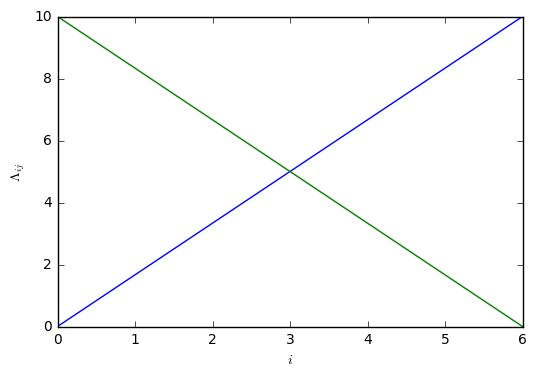

In [3]:
L0, L1 = L.T
plt.plot(L0)
plt.plot(L1)

plt.xlabel('$i$')
plt.ylabel('$\Lambda_{ij}$')

### Fitting data to generative model

$$\mathbf{x} = \mathbf{\Lambda{z}}+\mathbf{u}$$

cycle 1, log-likelihood -4.034489521762509e+19
cycle 2, log-likelihood -4.010585087143381e+19
cycle 3, log-likelihood -3.4532214571600925e+19
cycle 4, log-likelihood -2.9792403162209823e+18
cycle 5, log-likelihood -2.1961718499921984e+16
cycle 6, log-likelihood -1770219123534169.2
cycle 7, log-likelihood -540646642010053.8
cycle 8, log-likelihood -249383576612169.3
cycle 9, log-likelihood -13202956310048.67
cycle 10, log-likelihood -4245006340.6748095
cycle 11, log-likelihood -3658505265.3593683
cycle 12, log-likelihood -10432837137.932585
	breaking, LL=-10432837137.932585


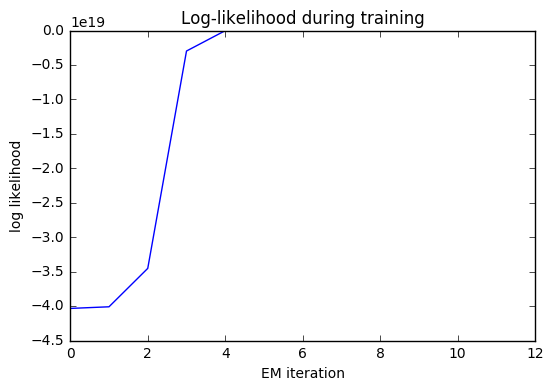

In [4]:
model = FactorAnalyzer(n_factors=2)
Lp, Pp = model.fit(X, verbose=True)

plt.plot(model.LL)
plt.title("Log-likelihood during training")
plt.ylabel("log likelihood")
plt.xlabel("EM iteration")

### Plotting factor loading matrix elements for each latent variable

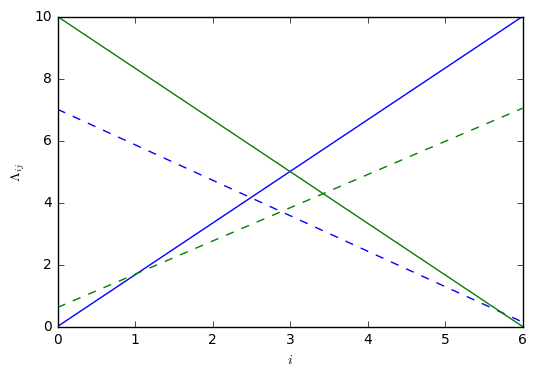

In [5]:
Lp0, Lp1 = Lp.T
plt.plot(L0, 'b'), plt.plot(Lp0, 'b--')
plt.plot(L1, 'g'), plt.plot(Lp1, 'g--')

plt.xlabel('$i$')
plt.ylabel('$\Lambda_{ij}$')

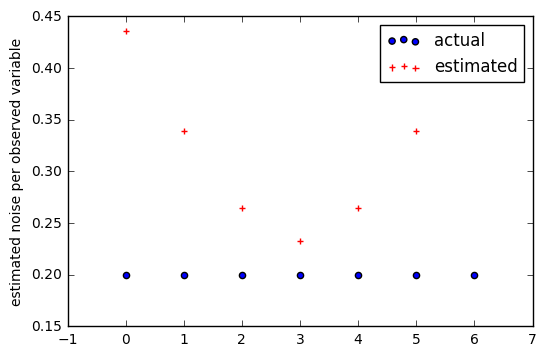

In [6]:
nup = np.sqrt(np.diag(Pp))
plt.scatter(range(len(nu)), nu, c='b', label='actual')
plt.scatter(range(len(nu)), nup, c='r', marker='+', label='estimated')
plt.legend()
plt.ylabel("estimated noise per observed variable")